# Census Income Project

#### Steps used:
    
1> Data cleansing and Wrangling
2> Define the metrics for which model is getting optimized.
3> Feature Engineering
4> Data Pre-processing
5> Feature Selection
6> Split the data into training and test data sets.
7> Model Selection
8> Model Validation 
9> Interpret the result

# Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('census_income.csv')

In [4]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.shape

(32560, 15)

In [7]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

## Logistic Regression Kind of technique need to resolve this problem

# EDA Process

In [8]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Min - Max: As there is alot of diffrence between min-max one need to do is scaling of data.

### Checking null values in dataset

In [9]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Observation: None of the column is having null values

In [10]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [11]:
print("Number of Categories: ")
for ColName in data[['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income']]:
    print("{} = {}".format(ColName,len(data[ColName].unique())))

Number of Categories: 
Age = 73
Workclass = 9
Fnlwgt = 21647
Education = 16
Education_num = 16
Marital_status = 7
Occupation = 15
Relationship = 6
Race = 5
Sex = 2
Capital_gain = 119
Capital_loss = 92
Hours_per_week = 94
Native_country = 42
Income = 2


Observation: This represents number of categories of particular type of data.
    As, Income which is going to be target variable is having 2 types of data so one will be using Logistic Regression

### Data Cleaning

### Skewness

In [12]:
data.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [13]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Maximum skewness is present in Capital_gain then, Capital_loss then, Fnlwgt

## Encoding

In [14]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [15]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [16]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


## Correlation

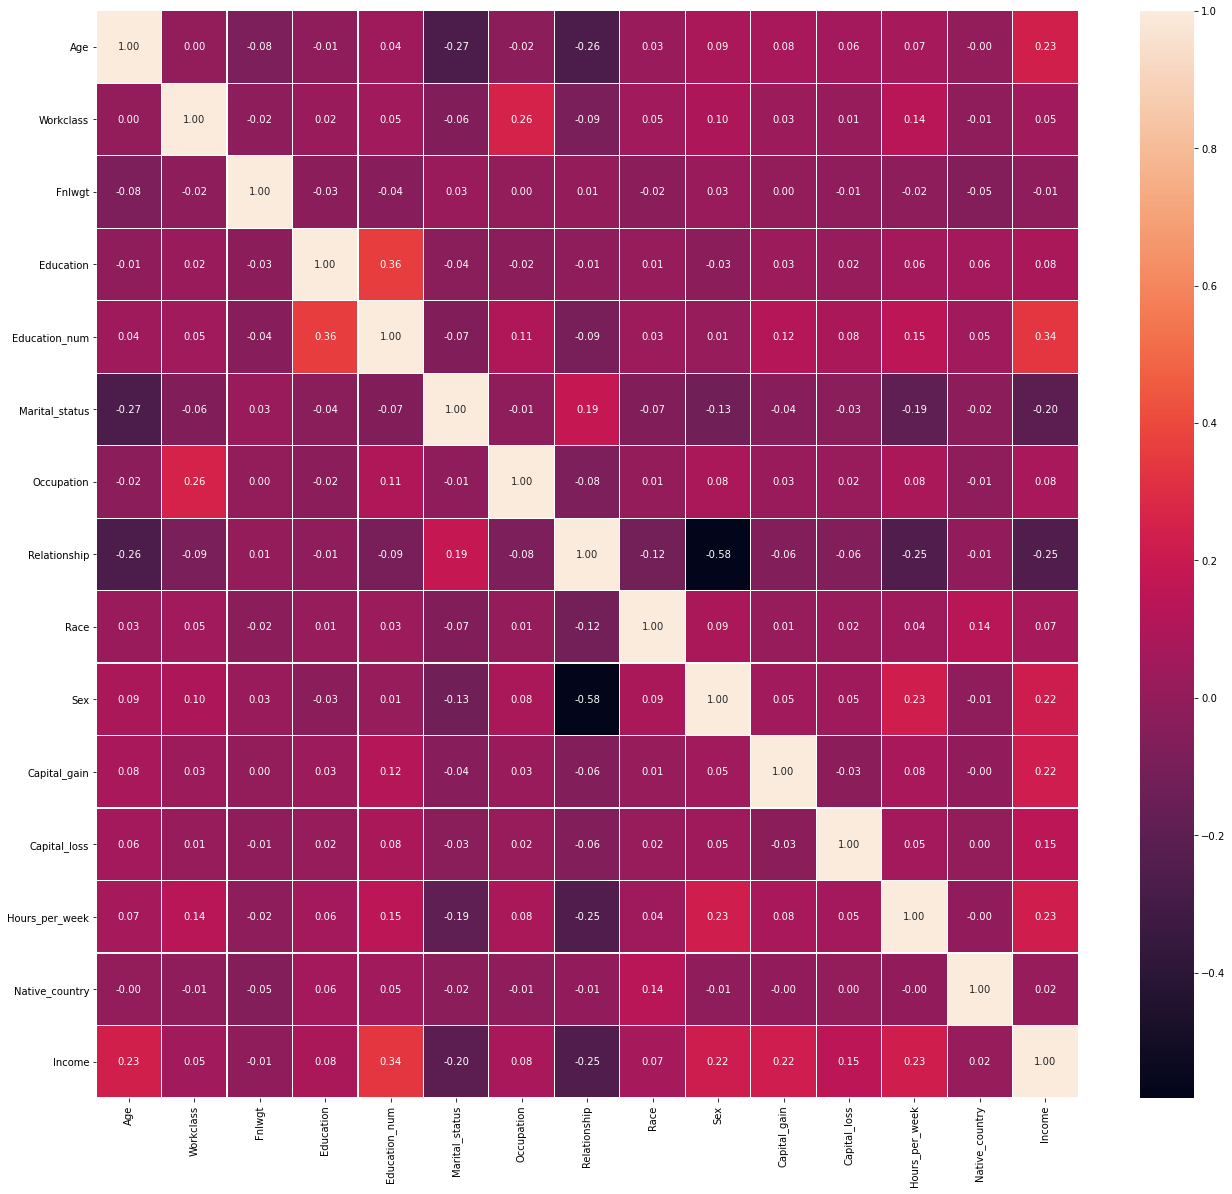

In [17]:
corr_matrix_hmap=data.corr()
plt.figure(figsize=(22,20))
sns.heatmap(corr_matrix_hmap,annot=True,linewidths=0.1,fmt="0.2f")
plt.show()

In [18]:
corr_matrix_hmap["Income"].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

Onservation: Most Corelated variable with income is Education_num, Negatively correalted is Relationship

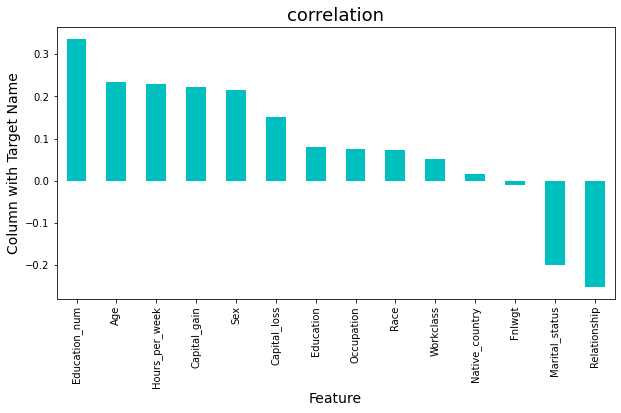

In [19]:
plt.figure(figsize=(10,5))
data.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target Name',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


Max correlated: Education_num

### Outliers

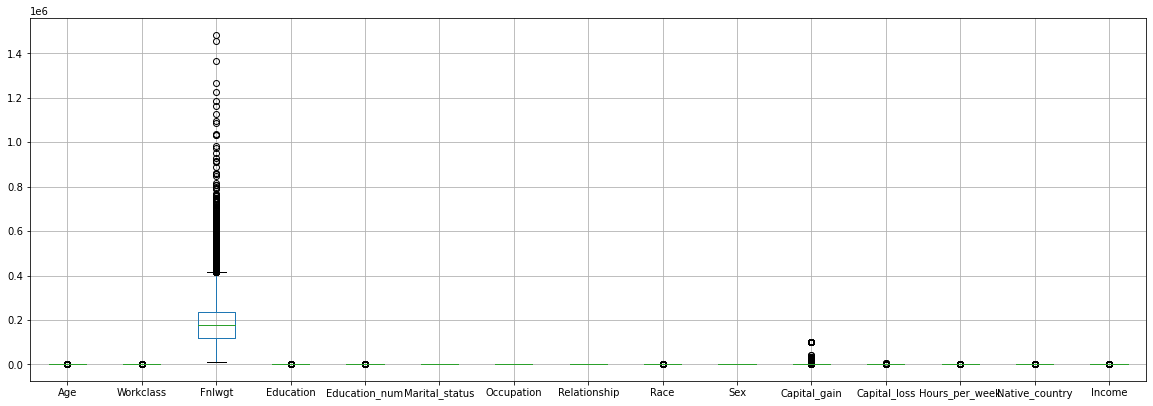

In [20]:
#checking for outliers
data.iloc[:,:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Max outliers are presnt in: Fnlwgt then, Capital_gain and so on

In [21]:
# Removing Outliers
from scipy.stats import zscore
z= np.abs(zscore(data))
z

array([[0.83709708, 1.46388339, 1.0087417 , ..., 2.22212013, 0.29157343,
        0.5632099 ],
       [0.04264043, 0.09012148, 0.24504633, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.05703146, 0.09012148, 0.42576955, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       ...,
       [1.42358875, 0.09012148, 0.3588108 , ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.21562378, 0.09012148, 0.11092744, ..., 1.65520046, 0.29157343,
        0.5632099 ],
       [0.98372   , 0.77700244, 0.92986178, ..., 0.03542999, 0.29157343,
        1.77553698]])

In [22]:
threshold = 3
print(np.where(z<3))

(array([    0,     0,     0, ..., 32559, 32559, 32559], dtype=int64), array([ 0,  1,  2, ..., 12, 13, 14], dtype=int64))


In [23]:
#removing outliers
data_new = data[(z<3).all(axis=1)]

In [24]:
data.shape

(32560, 15)

In [25]:
#After removing outliers
data_new.shape

(27417, 15)

In [26]:
data=data_new
data.shape

(27417, 15)

In [27]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
5,49,4.0,160187,6.0,5,3.0,8.0,1.0,2.0,0.0,0,0,16,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


Outliers are been handled

## Seperating independent variable and target varibale

In [28]:
# x= independent variable
x = data.iloc[:,0:-1]
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0
5,49,4.0,160187,6.0,5,3.0,8.0,1.0,2.0,0.0,0,0,16,23.0


In [29]:
#y = target variable = Income
y = data.iloc[:,-1]
y.head()

0    0.0
1    0.0
2    0.0
4    0.0
5    0.0
Name: Income, dtype: float64

In [30]:
x.shape


(27417, 14)

In [31]:
y.shape

(27417,)

### Rechecking Skewness after removing outliers and handling it

In [32]:
x.skew()

Age                0.483478
Workclass         -0.738023
Fnlwgt             0.626221
Education         -0.957458
Education_num     -0.143960
Marital_status    -0.044317
Occupation         0.131148
Relationship       0.750207
Race              -2.592931
Sex               -0.684115
Capital_gain       4.934878
Capital_loss      29.325736
Hours_per_week    -0.358396
Native_country    -5.460675
dtype: float64

Max skewness= Capital_loss then , Capital_gain and then, Fnlwgt

In [33]:
x.dtypes

Age                 int64
Workclass         float64
Fnlwgt              int64
Education         float64
Education_num       int64
Marital_status    float64
Occupation        float64
Relationship      float64
Race              float64
Sex               float64
Capital_gain        int64
Capital_loss        int64
Hours_per_week      int64
Native_country    float64
dtype: object

Numerical variables: Age, Fnlwgt, Education_num, Capital_gain , Capital_loss, Hours_per_week

#### Handling skewness

In [34]:
#Method for removing skew

from sklearn.preprocessing import power_transform
z = power_transform(x[0:])
data_new= pd.DataFrame(z,columns=x.columns)

In [35]:
x = data_new

In [36]:
#after removing skewness
x.skew()

Age               -0.018272
Workclass          0.073827
Fnlwgt            -0.035195
Education         -0.314997
Education_num      0.028000
Marital_status    -0.128651
Occupation        -0.182675
Relationship       0.108587
Race              -2.533505
Sex               -0.684115
Capital_gain       3.069625
Capital_loss      24.623864
Hours_per_week     0.104401
Native_country     0.777698
dtype: float64

# Visulization of Data

For categorical data we can use: counterplot and for numerical data we can use: distplot 

In [37]:
x.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country'],
      dtype='object')

In [38]:
df_visual= x[['Age', 'Fnlwgt', 'Education_num','Capital_gain', 'Capital_loss', 'Hours_per_week']].copy()

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

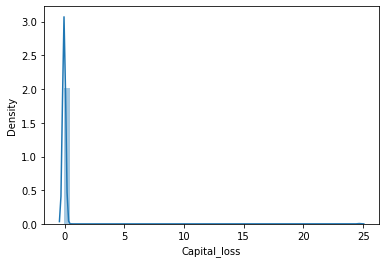

In [39]:
import seaborn as sns
sns.distplot(df_visual['Capital_loss'],kde=True)

In [40]:
x['Capital_loss'].describe()

count    2.741700e+04
mean    -1.762918e-15
std      1.000018e+00
min     -4.054646e-02
25%     -4.054646e-02
50%     -4.054646e-02
75%     -4.054646e-02
max      2.466306e+01
Name: Capital_loss, dtype: float64

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

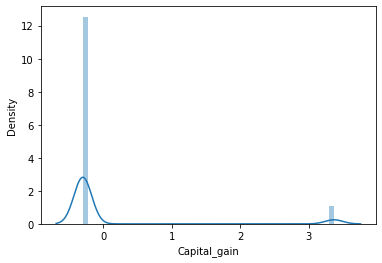

In [41]:
sns.distplot(df_visual['Capital_gain'],kde=True)

That is, In Capital_gain there is lot of overfitting unlike,Capital_loss

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

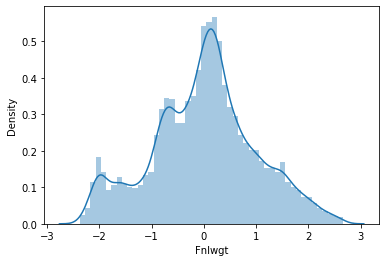

In [42]:
sns.distplot(df_visual['Fnlwgt'],kde=True)

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

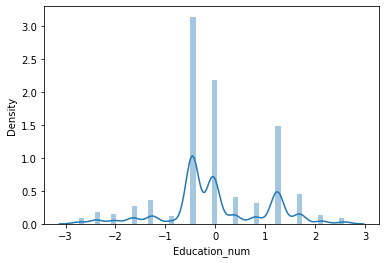

In [43]:
sns.distplot(df_visual['Education_num'],kde=True)

here there is overfitting

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

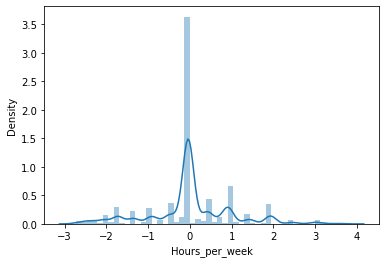

In [44]:
sns.distplot(df_visual['Hours_per_week'],kde=True)


Here also there is Overfitting at 0

## Scaling 

In [45]:
x.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
count,2.741700e+04,2.741700e+04,2.741700e+04,2.741700e+04,2.741700e+04,2.741700e+04,2.741700e+04,2.741700e+04,2.741700e+04,2.741700e+04,2.741700e+04,2.741700e+04,2.741700e+04,2.741700e+04
mean,-3.115444e-16,2.743790e-16,1.233770e-16,-5.726869e-16,7.770589e-16,-5.364013e-16,-1.738811e-16,3.308600e-16,-1.567776e-15,-5.023114e-16,-4.480576e-16,-1.762918e-15,-3.866212e-16,-1.236757e-15
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-1.956514e+00,-2.274236e+00,-2.375648e+00,-2.164952e+00,-2.733285e+00,-1.758923e+00,-1.830211e+00,-1.108479e+00,-2.883576e+00,-1.398916e+00,-2.970443e-01,-4.054646e-02,-2.733996e+00,-4.339239e+00
25%,-8.013878e-01,1.669779e-02,-6.495005e-01,-4.907924e-01,-4.603944e-01,-3.831658e-01,-7.611376e-01,-1.108479e+00,3.471641e-01,-1.398916e+00,-2.970443e-01,-4.054646e-02,-3.813668e-02,1.721349e-01
50%,5.354684e-02,1.669779e-02,4.247526e-02,7.628990e-02,-4.660744e-02,-3.831658e-01,2.231907e-01,1.036057e-01,3.471641e-01,7.148390e-01,-2.970443e-01,-4.054646e-02,-3.813668e-02,1.721349e-01
75%,7.406927e-01,1.669779e-02,5.979058e-01,3.810277e-01,8.038227e-01,9.109067e-01,8.348152e-01,1.073858e+00,3.471641e-01,7.148390e-01,-2.970443e-01,-4.054646e-02,4.309544e-01,1.721349e-01
max,2.349919e+00,3.533653e+00,2.671258e+00,1.374371e+00,2.583760e+00,2.161095e+00,1.555985e+00,1.549009e+00,3.471641e-01,7.148390e-01,3.366541e+00,2.466306e+01,3.776773e+00,1.948854e+01


In [46]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [47]:
x=mms.fit_transform(x)

In [48]:
x

array([[0.66885823, 0.67603366, 0.24787366, ..., 0.        , 0.07996125,
        0.1893325 ],
       [0.48416316, 0.39445209, 0.55255072, ..., 0.        , 0.41406159,
        0.1893325 ],
       [0.70939985, 0.39445209, 0.58823678, ..., 0.        , 0.41406159,
        0.1893325 ],
       ...,
       [0.77305542, 0.39445209, 0.42147036, ..., 0.        , 0.41406159,
        0.1893325 ],
       [0.14612161, 0.39445209, 0.52513844, ..., 0.        , 0.15576132,
        0.1893325 ],
       [0.69609496, 0.52952819, 0.68140592, ..., 0.        , 0.41406159,
        0.1893325 ]])

### Can do PDA but to loss of data will try to avoid it

# Model Training

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = 42)


In [50]:
x_train.shape

(18369, 14)

In [51]:
y_train.shape

(18369,)

In [52]:
x_test.shape

(9048, 14)

In [53]:
y_test.shape

(9048,)

In [54]:
y_train

2101     0.0
19755    0.0
5527     0.0
22122    1.0
9185     0.0
        ... 
25580    1.0
6426     0.0
1012     1.0
18722    0.0
28052    0.0
Name: Income, Length: 18369, dtype: float64

In [55]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [56]:
lm.fit(x_train,y_train)

LogisticRegression()

In [57]:
lm.coef_

array([[ 2.371551  , -0.44635615,  0.39846489,  0.28728306,  4.25794032,
        -0.97172981,  0.16580853, -1.60887335,  0.43250127,  0.26043484,
         1.5076403 , -1.51775839,  2.44513773,  0.79336355]])

In [58]:
lm.intercept_

array([-6.15990543])

In [59]:
lm.score(x_train,y_train)

0.8307474549512766

#### Prediction

In [60]:
#predict the values
pred=lm.predict(x_test)
print("Predicted Allitation",pred)
print("Actual Allitation",y_test)

Predicted Allitation [0. 0. 0. ... 1. 0. 1.]
Actual Allitation 7409     0.0
21693    0.0
18788    0.0
18570    1.0
10013    0.0
        ... 
4374     0.0
1577     0.0
28804    1.0
20316    0.0
9638     1.0
Name: Income, Length: 9048, dtype: float64


In [61]:
print('Accuracy Score:',accuracy_score(y_test,pred))

Accuracy Score: 0.8247126436781609


# Finding Best Random State

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc =accuracy_score(y_test,predrf)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        
print("Best score is: ",maxAccu,"on Random_state",maxRS)

Best score is:  0.8386383731211318 on Random_state 37


# Train-Test Model based on Random State

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = 37)
LR = LogisticRegression()
LR.fit(x_train,y_train)
predrf = LR.predict(x_test)

In [66]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
print('Accuracy Score:', accuracy_score(y_test,predrf))
print('Confusion Matrix:', confusion_matrix(y_test,predrf))
print('Classification Report:', classification_report(y_test,predrf))

Accuracy Score: 0.8386383731211318
Confusion Matrix: [[6675  394]
 [1066  913]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      7069
         1.0       0.70      0.46      0.56      1979

    accuracy                           0.84      9048
   macro avg       0.78      0.70      0.73      9048
weighted avg       0.83      0.84      0.83      9048



In [67]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test,preddt))
print('Confusion Matrix:', confusion_matrix(y_test,preddt))
print('Classification Report:', classification_report(y_test,preddt))

Accuracy Score: 0.8097922192749779
Confusion Matrix: [[6147  922]
 [ 799 1180]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.88      0.87      0.88      7069
         1.0       0.56      0.60      0.58      1979

    accuracy                           0.81      9048
   macro avg       0.72      0.73      0.73      9048
weighted avg       0.81      0.81      0.81      9048



In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test,predrfc))
print('Confusion Matrix:', confusion_matrix(y_test,predrfc))
print('Classification Report:', classification_report(y_test,predrfc))

Accuracy Score: 0.8561007957559682
Confusion Matrix: [[6576  493]
 [ 809 1170]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      7069
         1.0       0.70      0.59      0.64      1979

    accuracy                           0.86      9048
   macro avg       0.80      0.76      0.78      9048
weighted avg       0.85      0.86      0.85      9048



In [69]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test,predsvm))
print('Confusion Matrix:', confusion_matrix(y_test,predsvm))
print('Classification Report:', classification_report(y_test,predsvm))

Accuracy Score: 0.8450486295313882
Confusion Matrix: [[6670  399]
 [1003  976]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      7069
         1.0       0.71      0.49      0.58      1979

    accuracy                           0.85      9048
   macro avg       0.79      0.72      0.74      9048
weighted avg       0.83      0.85      0.83      9048



In [70]:


pred_train = LR.predict(x_train)
pred_test =LR.predict(x_test) 
Train_accuracy = accuracy_score(y_train,pred_train)
Test_accuracy = accuracy_score(y_test,pred_test)
maxAccu=0
maxRS=0


from sklearn.model_selection import cross_val_score
for j in range(2,16):
    cv_score=cross_val_score(LR,x,y,cv=j)
    cv_mean = cv_score.mean()
    if cv_mean > maxAccu:
        maxAccu = cv_mean
        maxRS = j
    print(f"At cross fold {j} cv score is {cv_mean} and accuracy score training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")

        
        
    print("\n")
    
        
    
    
 
    

At cross fold 2 cv score is 0.8289018226042104 and accuracy score training is 0.8238336327508302 and accuracy for the testing is 0.8386383731211318


At cross fold 3 cv score is 0.8285005653426706 and accuracy score training is 0.8238336327508302 and accuracy for the testing is 0.8386383731211318


At cross fold 4 cv score is 0.8284277342773109 and accuracy score training is 0.8238336327508302 and accuracy for the testing is 0.8386383731211318


At cross fold 5 cv score is 0.828464215299514 and accuracy score training is 0.8238336327508302 and accuracy for the testing is 0.8386383731211318


At cross fold 6 cv score is 0.8283547083147952 and accuracy score training is 0.8238336327508302 and accuracy for the testing is 0.8386383731211318


At cross fold 7 cv score is 0.8285371312460091 and accuracy score training is 0.8238336327508302 and accuracy for the testing is 0.8386383731211318


At cross fold 8 cv score is 0.8286832927922575 and accuracy score training is 0.8238336327508302 and 

In [71]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(LR,x,y,cv=j)
cv_mean = cv_score.mean()
print("Cross validation score for Logistic Regression",cv_mean)

Cross validation score for Logistic Regression 0.8285370148797296


In [72]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(dt,x,y,cv=j)
cv_mean = cv_score.mean()
print("Cross validation score for Decision Tree",cv_mean)

Cross validation score for Decision Tree 0.806178016198389


In [74]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(rfc,x,y,cv=j)
cv_mean = cv_score.mean()
print("Cross validation score for Random Forest Classifier",cv_mean)

Cross validation score for Random Forest Classifier 0.8525733217237028


In [76]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(svm,x,y,cv=j)
cv_mean = cv_score.mean()
print("Cross validation score for Support Vector Machhine",cv_mean)

Cross validation score for Support Vector Machhine 0.8349559668430867


#### Decision Tree and Random Forest shows max accuracy

%Accuracyscore = accuracy - crossvalidation

# Regularization

To mitigate the problem of overfitting and underfitting Regularization Methods are used: Lasso, Ridge or ElasticNet .

In [78]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [79]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
EN=ElasticNet()
clf=GridSearchCV(EN,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [80]:
EN = ElasticNet(alpha=0.0001,random_state=0)
EN.fit(x_train,y_train)
EN.score(x_train,y_train)
pred_EN=EN.predict(x_test)

lss= accuracy_score(y_test,pred_test)
lss

0.8386383731211318

In [82]:
#cross_validation_mean = cv_mean
#cross_validation_score= cv_score

cross_validation_score = cross_val_score(EN,x,y,cv=5)
cross_validation_mean = cross_validation_score.mean()
cross_validation_mean

0.26981555914204935

# Ensemble Technique

In [83]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':np.arange(2,15),'criterion':["gini","entrophy"]}

rf = DecisionTreeClassifier()
clf=GridSearchCV(rf,parameters,cv=5)
clf.fit(x_train,y_train)
print(clf.best_params_)



{'criterion': 'gini', 'max_depth': 5}


In [88]:
rf=DecisionTreeClassifier(criterion="gini",max_depth=5)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()

print("Cross Validation Score:",rfc*100)

#print(clf.best_params_)

Accuracy Score: 85.72060123784262
Cross Validation Score: 85.27557626896105
{'criterion': 'gini', 'max_depth': 5}


# Saving Model

In [85]:
import pickle
filename = "Census_Income.pkl"
pickle.dump(rf,open(filename,"wb"))


# Conclusion

In [86]:
loaded_model=pickle.load(open('Census_Income.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8572060123784262


In [87]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,9038,9039,9040,9041,9042,9043,9044,9045,9046,9047
Predicted,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Original,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Our model shows 85% accuracy